# Pubcrypt benchmarking

In this notebook we are talking about code performance. The first goal of Pubcrypt was to create a fully working RSA keypair generator and now that this goal have been reached, I'm revising function that seem slow. Indeed, my generator isn't very performant and I want to find the reasons of that. 

This notebook work with different sections, each section is a case where I found something unusual in a function and I'm trying to figure out whats wrong. Then I explain the solution, fix the problem in the main branch and give some recommandations.

At the end of the notebook, I'm giving usefull links where you can find good tutorial about code performance.


## Table of contents



## Case #1: Miller Rabin primality test

The first algorithm I was worried about was my Miller-Rabin primality test. Something was weird about it because even if this algorithm is probabilistic, my key generation was very slow and not regular at all (from 4s to 20s). 
This is a benchmark of generate() and miller_rabin() at version 1.1 of Pubcrypt:

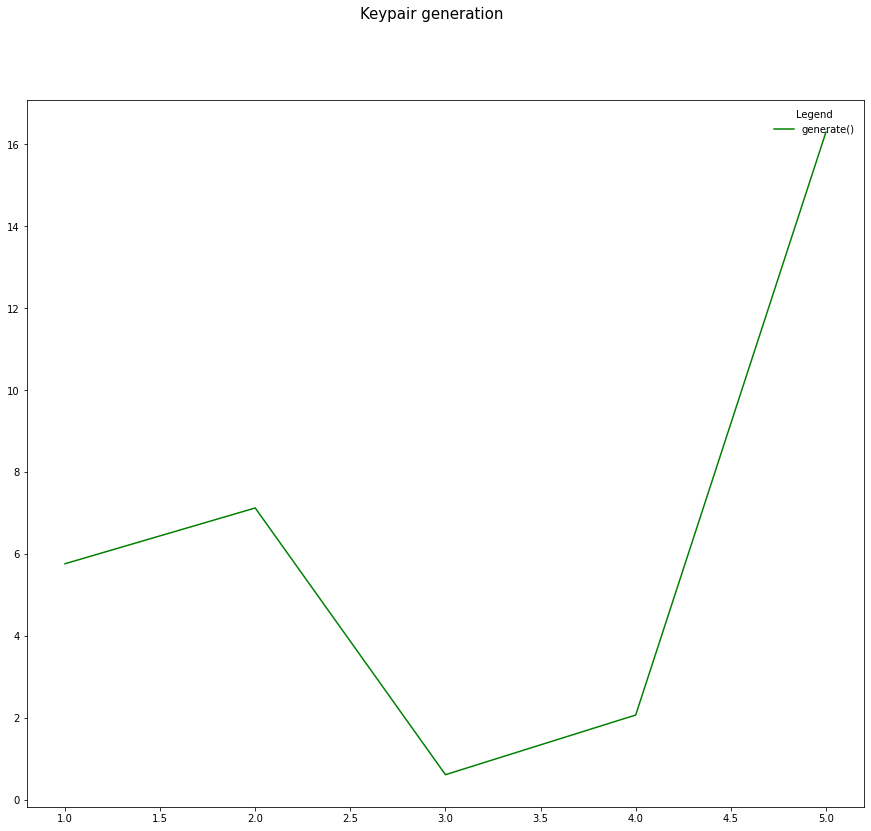

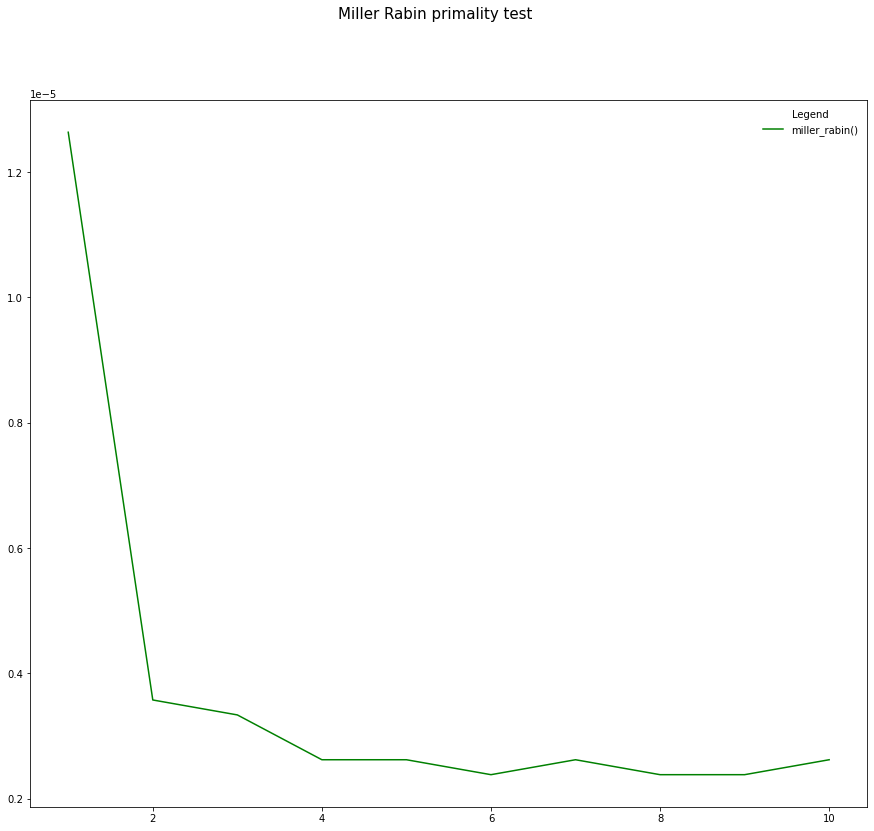

In [2]:
from benchmark.generate import *

launch_generate_bench(5, 2048)
launch_miller_rabin_bench(10, 1024)